In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


# Gradient Descent

In [3]:
def loss(y, y_pred):
    return ((y - y_pred) ** 2).mean() / 2

In [4]:
def gradient_descent(x, y, epochs, lr):
    m, c = 0, 0
    n = len(x)
    cache = [[m, c, loss(y, m * x + c)]]
    for _ in range(epochs):
        y_pred = m * x + c
        d_m = (-1/n) * sum(x * (y - y_pred))
        d_c = (-1/n) * sum(y - y_pred)
        m -= lr * d_m
        c -= lr * d_c
        cache.append([m, c, loss(y, y_pred)])
    return np.array(cache)

# Training

In [5]:
x = df['x'].values
y = df['y'].values
epochs = 20
lr = 0.0001
cache = gradient_descent(x, y, epochs, lr)
m, c, l = cache[-1]
print(f'm: {m}, c: {c}, loss: {l}')

m: 1.4741169554206186, c: 0.02957447798861651, loss: 56.37593705891378


# Plotting

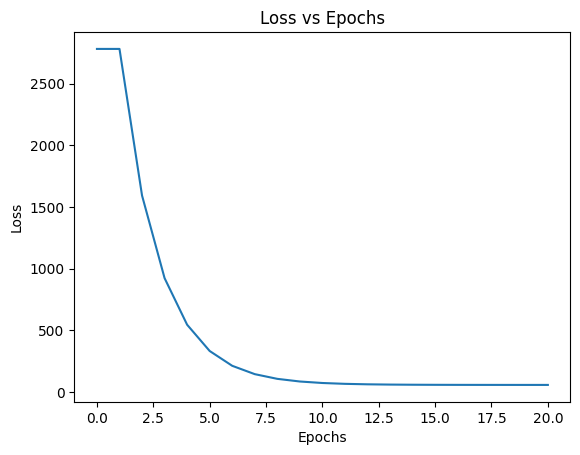

In [6]:
plt.plot(cache[:, 2])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

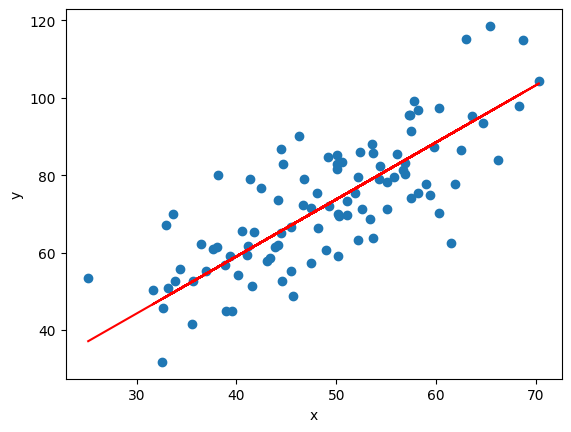

In [7]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.scatter(x, y)
line, = ax.plot(x, m * x + c, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(i):
    ax.set_title(f'Epoch: {i+1}, Loss: {cache[i, 2]:.2f}')
    line.set_ydata(cache[i, 0] * x + cache[i, 1])
    return line,

ani = FuncAnimation(fig, animate, frames=len(cache), interval=100)
plt.show()

In [8]:
from IPython.display import HTML
HTML(ani.to_html5_video())

# Testing

In [10]:
test_index = np.random.randint(0, len(x))
x_test, y_test = x[test_index], y[test_index]
y_pred = m * x_test + c
print(f'x: {x_test}, -> y_pred: {y_pred}')
print(f'Actual y: {y_test} with loss: {loss(y_test, y_pred)}')

x: 41.18201611, -> y_pred: 60.73668268414468
Actual y: 61.68403752 with loss: 0.448740592509225
